In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r"C:\Users\VISHNU\Downloads\Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


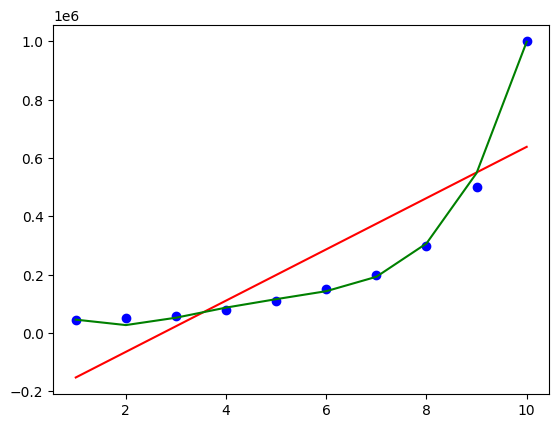

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
X=df[['Level']]
y=df['Salary']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
poly=PolynomialFeatures(degree=4)
scaler=StandardScaler()
X_train_poly=poly.fit_transform(x_train)
X_test_poly=poly.transform(x_test)
x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.transform(x_test)
model=LinearRegression()
poly_model=LinearRegression()
model.fit(x_train_scaler,y_train)
poly_model.fit(X_train_poly,y_train)
y_pred=model.predict(x_test_scaler)
y_poly_pred=poly_model.predict(X_test_poly)
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(scaler.transform(X)), color='red')
plt.plot(X, poly_model.predict(poly.transform(X)), color='green')
plt.show()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae1 = mean_absolute_error(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred)
r21 = r2_score(y_test, y_pred)
print("mean absolute error for linear regression :", mae1)
print("mean square error for linear regression :", mse1)
print("r_square score for linear regression :",r21)
mae2=mean_absolute_error(y_test, y_poly_pred)
mse2=mean_squared_error(y_test, y_poly_pred)
r22=r2_score(y_test, y_poly_pred)
print("mean absolute error for polynomial regression :", mae2)
print("mean square error for polynomial regression :", mse2)
print("r_square score for polynomial regression :",r22)


mean absolute error for linear regression : 82607.75862068962
mean square error for linear regression : 7840057409.334121
r_square score for linear regression : 0.8451346684575975
mean absolute error for polynomial regression : 35700.35460982748
mean square error for polynomial regression : 1444499305.5435529
r_square score for polynomial regression : 0.9714666803843249
